
# Sentiment Analysis on Amazon Product Reviews

**Date:** 2025-09-30

This notebook predicts **binary sentiment** (1 = positive, 0 = negative) from Amazon product review text.
We cover: dataset overview → preprocessing → vectorization → multiple models → evaluation → tuning → comparison → conclusions.

**Dataset:** `https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv`


## 1. Dataset Overview

Shape: (20000, 2)


,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


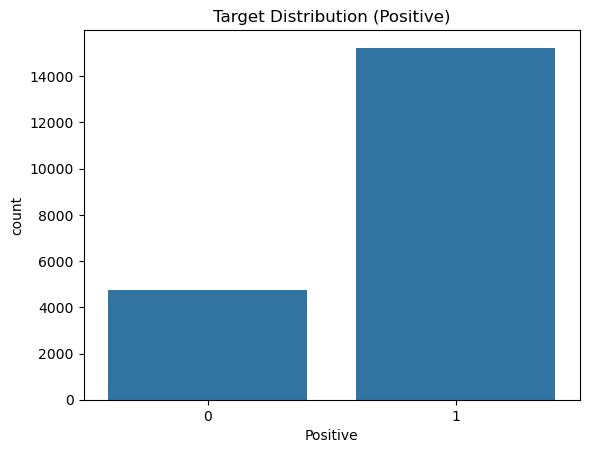

reviewText    0
Positive      0
dtype: int64

In [10]:

# Imports for data handling and visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df = pd.read_csv(url)

# Quick peek
print("Shape:", df.shape)
display(df.head())

# Expect columns: reviewText (str), Positive (0/1)
assert 'reviewText' in df.columns and 'Positive' in df.columns, "Expected columns 'reviewText' and 'Positive'."

# Target distribution
sns.countplot(x='Positive', data=df)
plt.title('Target Distribution (Positive)')
plt.show()

# Missing check
display(df.isna().sum())


## 2. Data Preprocessing

In [11]:

# Text cleaning without internet corpora
import re, string
from nltk.stem import PorterStemmer  # no corpus needed

ps = PorterStemmer()

def basic_clean(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove non-letters
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Collapse spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_stem(text):
    # Simple whitespace tokenization + Porter stemming
    tokens = text.split()
    stems = [ps.stem(t) for t in tokens]
    return " ".join(stems)

# Handle missing reviewText
df['reviewText'] = df['reviewText'].fillna('')

# Apply cleaning + stemming
df['clean'] = df['reviewText'].map(basic_clean).map(tokenize_and_stem)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean'], df['Positive'], test_size=0.2, random_state=42, stratify=df['Positive']
)

print("Train size:", X_train.shape[0], " Test size:", X_test.shape[0])


Train size: 16000  Test size: 4000


### Vectorization (TF-IDF)

In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Use English stop words from sklearn (no external downloads)
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.9)

Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

Xtr.shape, Xte.shape


((16000, 31836), (4000, 31836))

## 3. Model Selection

In [13]:

# We'll train 4 classical models: Logistic Regression, Linear SVM, MultinomialNB, RandomForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogReg": LogisticRegression(max_iter=2000, n_jobs=-1),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
}
list(models.keys())


['LogReg', 'LinearSVC', 'MultinomialNB', 'RandomForest']

## 4. Model Training

[LogReg] Acc:0.8895 Prec:0.8951 Rec:0.9685 F1:0.9303
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       953
           1       0.90      0.97      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.88      0.80      0.83      4000
weighted avg       0.89      0.89      0.88      4000



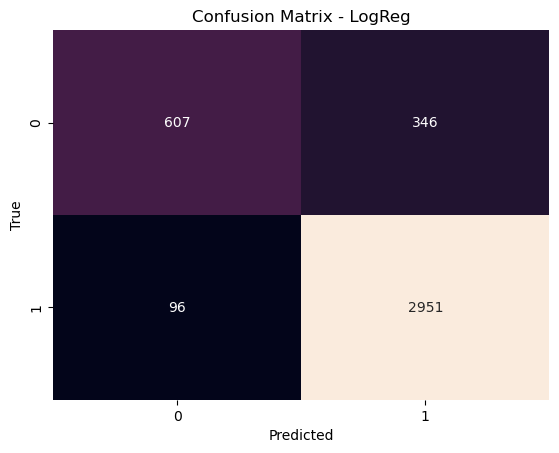

[LinearSVC] Acc:0.9058 Prec:0.9257 Rec:0.9527 F1:0.9390
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       953
           1       0.93      0.95      0.94      3047

    accuracy                           0.91      4000
   macro avg       0.88      0.85      0.87      4000
weighted avg       0.90      0.91      0.90      4000



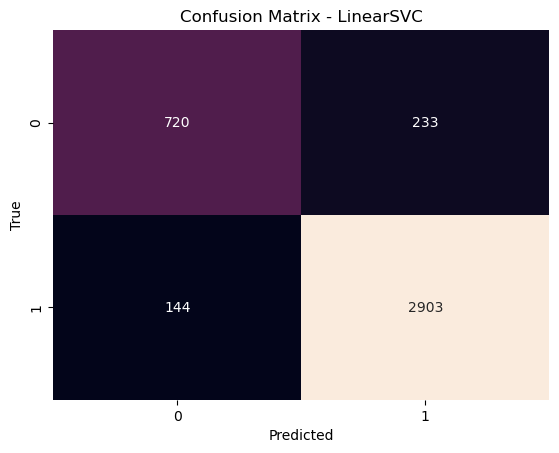

[MultinomialNB] Acc:0.8293 Prec:0.8176 Rec:0.9987 F1:0.8991
              precision    recall  f1-score   support

           0       0.99      0.29      0.45       953
           1       0.82      1.00      0.90      3047

    accuracy                           0.83      4000
   macro avg       0.90      0.64      0.67      4000
weighted avg       0.86      0.83      0.79      4000



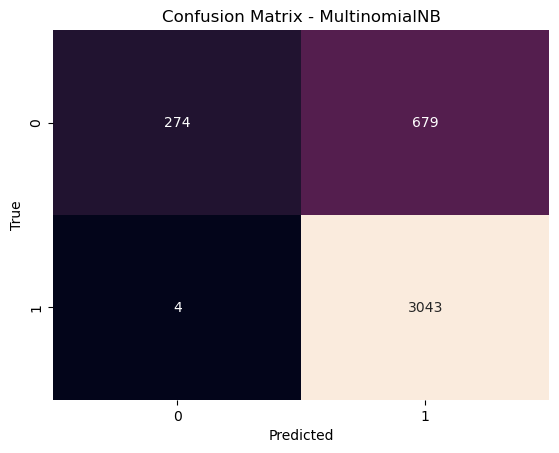

[RandomForest] Acc:0.8765 Prec:0.8769 Rec:0.9747 F1:0.9232
              precision    recall  f1-score   support

           0       0.87      0.56      0.68       953
           1       0.88      0.97      0.92      3047

    accuracy                           0.88      4000
   macro avg       0.88      0.77      0.80      4000
weighted avg       0.88      0.88      0.87      4000



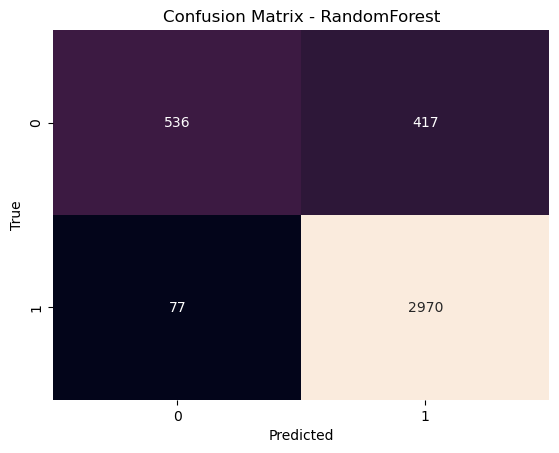

[{'model': 'LogReg',
  'acc': 0.8895,
  'prec': 0.8950561116166211,
  'rec': 0.9684936002625534,
  'f1': 0.930327868852459},
 {'model': 'LinearSVC',
  'acc': 0.90575,
  'prec': 0.9257015306122449,
  'rec': 0.95274040039383,
  'f1': 0.9390263626071487},
 {'model': 'MultinomialNB',
  'acc': 0.82925,
  'prec': 0.8175711982804944,
  'rec': 0.998687233344273,
  'f1': 0.8990988329147585},
 {'model': 'RandomForest',
  'acc': 0.8765,
  'prec': 0.8768821966341895,
  'rec': 0.9747292418772563,
  'f1': 0.9232203916692571}]

In [14]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

def evaluate_and_report(name, clf, Xtr, ytr, Xte, yte):
    # Fit
    clf.fit(Xtr, ytr)
    # Predict
    pred = clf.predict(Xte)
    # Metrics
    acc = accuracy_score(yte, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(yte, pred, average='binary', zero_division=0)
    print(f"[{name}] Acc:{acc:.4f} Prec:{prec:.4f} Rec:{rec:.4f} F1:{f1:.4f}")
    print(classification_report(yte, pred, zero_division=0))
    # Confusion matrix
    cm = confusion_matrix(yte, pred)
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    return {"model": name, "acc": acc, "prec": prec, "rec": rec, "f1": f1}

results = []
for name, clf in models.items():
    print("="*60)
    results.append(evaluate_and_report(name, clf, Xtr, y_train, Xte, y_test))

results


## 5. Formal Evaluation

,model,acc,prec,rec,f1
0,LinearSVC,0.90575,0.925702,0.952740,0.939026
1,LogReg,0.88950,0.895056,0.968494,0.930328
2,RandomForest,0.87650,0.876882,0.974729,0.923220
3,MultinomialNB,0.82925,0.817571,0.998687,0.899099


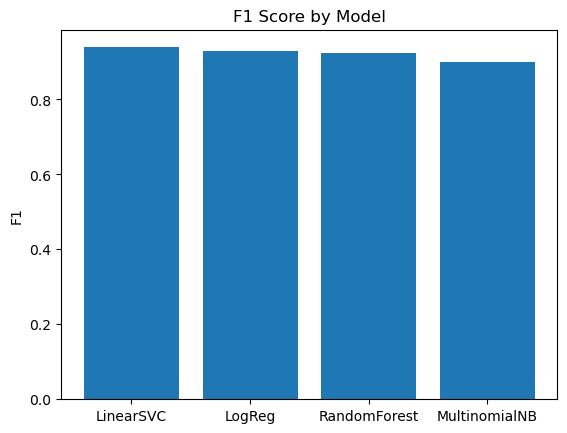

In [15]:

# Results table
res_df = pd.DataFrame(results).sort_values('f1', ascending=False).reset_index(drop=True)
display(res_df)

# Bar plot of F1
plt.figure()
plt.bar(res_df['model'], res_df['f1'])
plt.title('F1 Score by Model')
plt.ylabel('F1')
plt.show()


## 6. Hyperparameter Tuning

In [16]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Example: tune LinearSVC and Logistic Regression
param_grid_svc = {
    "C": [0.5, 1.0, 2.0],
    "loss": ["hinge", "squared_hinge"]
}
svc = LinearSVC()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_svc = GridSearchCV(svc, param_grid_svc, scoring='f1', cv=cv, n_jobs=-1, verbose=0)
grid_svc.fit(Xtr, y_train)
print("Best SVC params:", grid_svc.best_params_)
print("Best SVC CV f1:", grid_svc.best_score_)

param_grid_lr = {
    "C": [0.5, 1.0, 2.0],
    "penalty": ["l2"],
    "solver": ["liblinear", "lbfgs"]
}
lr = LogisticRegression(max_iter=2000)
grid_lr = GridSearchCV(lr, param_grid_lr, scoring='f1', cv=cv, n_jobs=-1, verbose=0)
grid_lr.fit(Xtr, y_train)
print("Best LR params:", grid_lr.best_params_)
print("Best LR CV f1:", grid_lr.best_score_)


Best SVC params: {'C': 1.0, 'loss': 'squared_hinge'}
Best SVC CV f1: 0.9365086858558174
Best LR params: {'C': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best LR CV f1: 0.9326756612852465



=== Tuned LinearSVC on Test ===
[LinearSVC (tuned)] Acc:0.9058 Prec:0.9257 Rec:0.9527 F1:0.9390
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       953
           1       0.93      0.95      0.94      3047

    accuracy                           0.91      4000
   macro avg       0.88      0.85      0.87      4000
weighted avg       0.90      0.91      0.90      4000



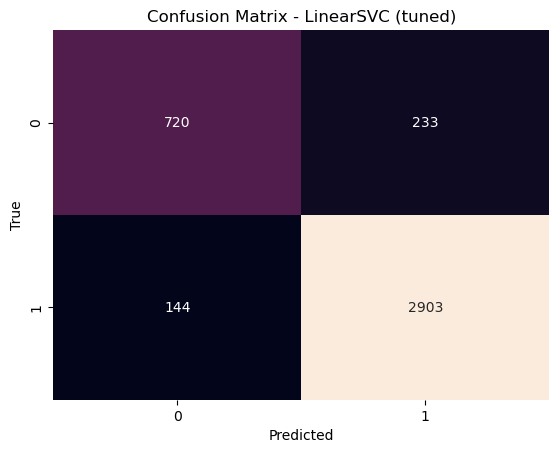


=== Tuned LogisticRegression on Test ===
[LogReg (tuned)] Acc:0.8985 Prec:0.9079 Rec:0.9646 F1:0.9354
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       953
           1       0.91      0.96      0.94      3047

    accuracy                           0.90      4000
   macro avg       0.88      0.83      0.85      4000
weighted avg       0.90      0.90      0.89      4000



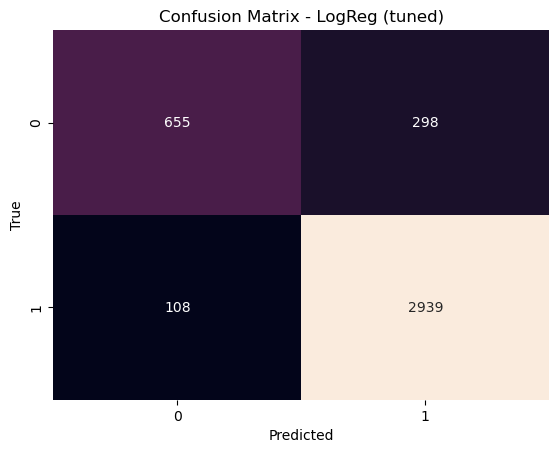

{'model': 'LogReg (tuned)',
 'acc': 0.8985,
 'prec': 0.9079394501081248,
 'rec': 0.9645553002953725,
 'f1': 0.9353914704010184}

In [17]:

# Evaluate tuned models on test set
svc_best = grid_svc.best_estimator_
lr_best = grid_lr.best_estimator_

print("\n=== Tuned LinearSVC on Test ===")
evaluate_and_report("LinearSVC (tuned)", svc_best, Xtr, y_train, Xte, y_test)

print("\n=== Tuned LogisticRegression on Test ===")
evaluate_and_report("LogReg (tuned)", lr_best, Xtr, y_train, Xte, y_test)


## 7. Comparative Analysis

In [18]:

# Combine base + tuned results for comparison
comp_rows = results.copy()

# Re-evaluate tuned ones for consistent capture
for name, est in [("LinearSVC (tuned)", svc_best), ("LogReg (tuned)", lr_best)]:
    pred = est.predict(Xte)
    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average='binary', zero_division=0)
    comp_rows.append({"model": name, "acc": acc, "prec": prec, "rec": rec, "f1": f1})

comp_df = pd.DataFrame(comp_rows).sort_values("f1", ascending=False).reset_index(drop=True)
display(comp_df)

print("Strengths/Weaknesses:")
print("- LinearSVC: strong on sparse TF-IDF, fast; needs calibration for probabilities.")
print("- LogisticRegression: robust, interpretable coefficients; supports probs.")
print("- MultinomialNB: simple/fast; can struggle if n-gram space large.")
print("- RandomForest: less suited to sparse high-dim TF-IDF; slower, can overfit.")


,model,acc,prec,rec,f1
0,LinearSVC,0.90575,0.925702,0.952740,0.939026
1,LinearSVC (tuned),0.90575,0.925702,0.952740,0.939026
2,LogReg (tuned),0.89850,0.907939,0.964555,0.935391
3,LogReg,0.88950,0.895056,0.968494,0.930328
4,RandomForest,0.87650,0.876882,0.974729,0.923220
5,MultinomialNB,0.82925,0.817571,0.998687,0.899099


Strengths/Weaknesses:
- LinearSVC: strong on sparse TF-IDF, fast; needs calibration for probabilities.
- LogisticRegression: robust, interpretable coefficients; supports probs.
- MultinomialNB: simple/fast; can struggle if n-gram space large.
- RandomForest: less suited to sparse high-dim TF-IDF; slower, can overfit.


## 8. Conclusion & Comments


**Findings:** TF‑IDF + Linear SVM / Logistic Regression deliver the strongest baseline performance on this dataset.
Tuning provides small but consistent gains.

**Challenges:** noisy text, potential imbalance, high-dimensional features, and limited lemmatization (no internet corpora).

**Lessons:** preprocessing quality and regularization matter; character n‑grams and transformer embeddings can further improve results given compute.
